In [1]:
# %pip install torch torchvision

Note: you may need to restart the kernel to use updated packages.


In [1]:
import torch as t

``` bash
zhouyuding@Mac ~$ ls /usr/local/opt/libomp/lib/libomp.dylib
ls: /usr/local/opt/libomp/lib/libomp.dylib: No such file or directory
zhouyuding@Mac ~$ brew install libomp
==> Downloading https://homebrew.bintray.com/bottles/libomp-8.0.0.mojave.bottle.tar.gz
==> Downloading from https://akamai.bintray.com/6c/6c8f66a6582efa00620593e16a41f3649018778a300cc772afbe79c711c2c396?__gda__=exp=1559480597~hmac=76e77b4306fee6
######################################################################## 100.0%
==> Pouring libomp-8.0.0.mojave.bottle.tar.gz
🍺  /usr/local/Cellar/libomp/8.0.0: 9 files, 1.3MB
zhouyuding@Mac ~$ ls /usr/local/opt/libomp/lib/libomp.dylib
/usr/local/opt/libomp/lib/libomp.dylib
```

Net(
  (layer1): Linear(in_features=1, out_features=10, bias=True)
  (layer2): Linear(in_features=10, out_features=10, bias=True)
  (predict): Linear(in_features=10, out_features=1, bias=True)
)


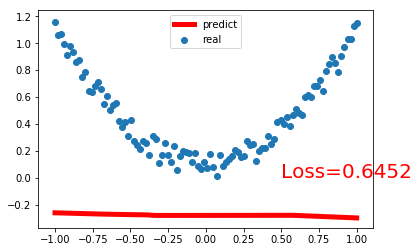

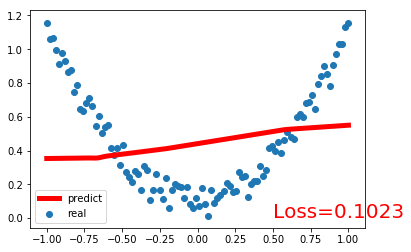

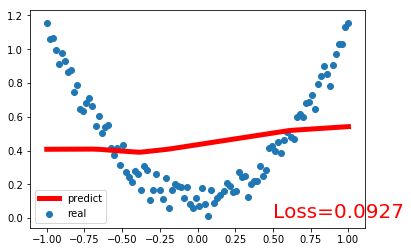

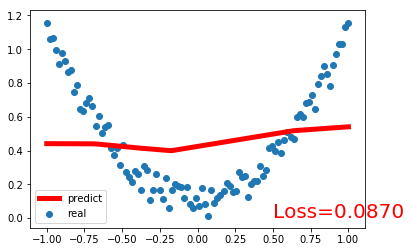

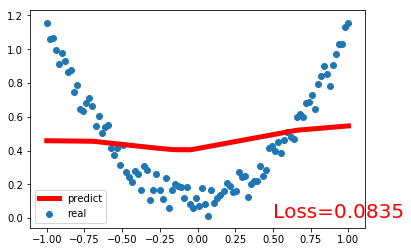

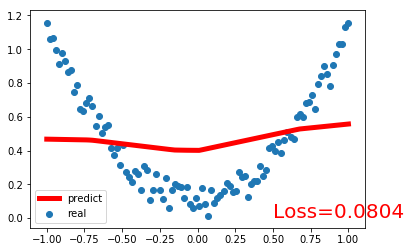

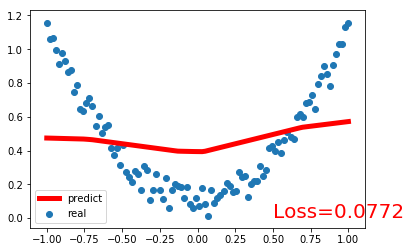

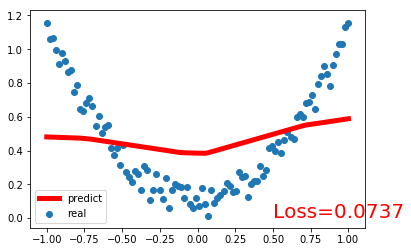

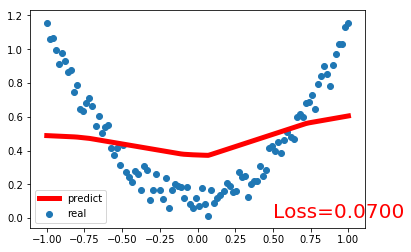

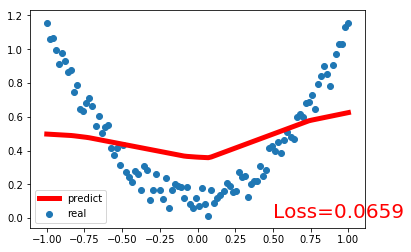

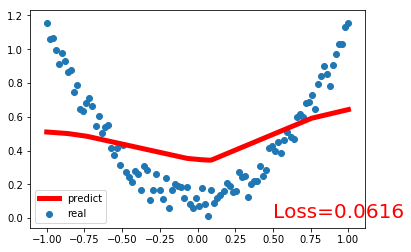

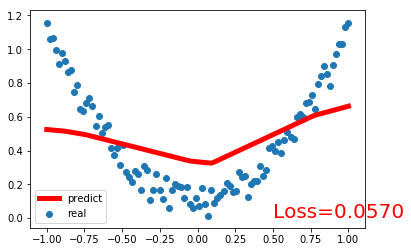

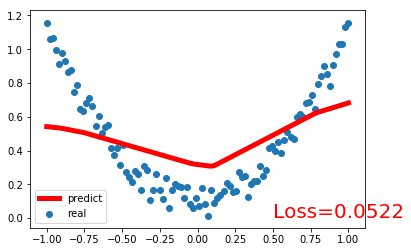

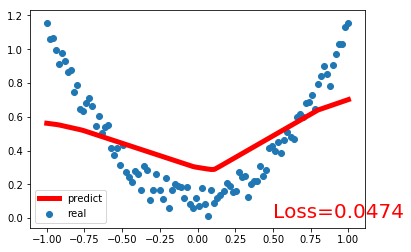

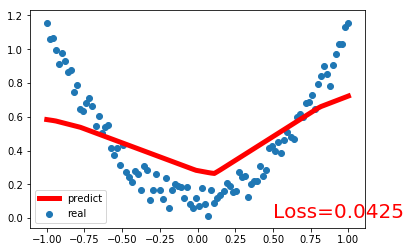

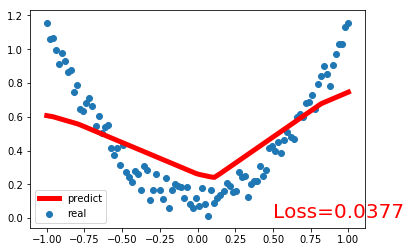

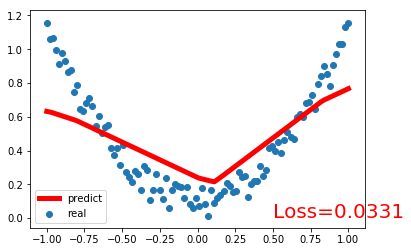

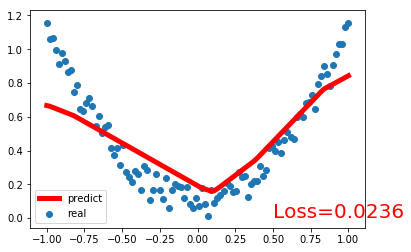

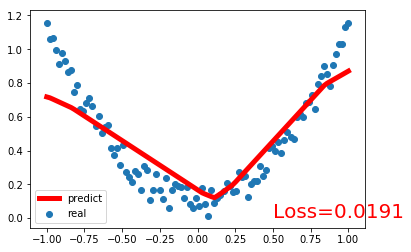

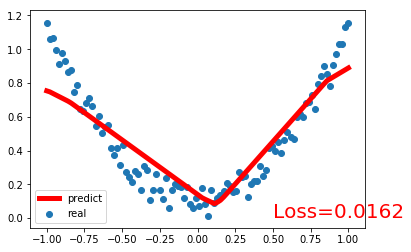

In [ ]:
import torch as t
import matplotlib.pyplot as plt
import torch.nn.functional as F
 
x = t.unsqueeze(t.linspace(-1, 1, 100), dim=1)
y = x.pow(2) + 0.2 * t.rand(x.size())
 
 
class Net(t.nn.Module):
    def __init__(self, n_feature, n_hidden1, n_hidden2, n_output):
        super(Net, self).__init__()  # 继承 __init__ 功能
        # 定义每层用什么样的形式
        self.layer1 = t.nn.Linear(n_feature, n_hidden1)  # 隐藏层线性输出
        self.layer2 = t.nn.Linear(n_hidden1, n_hidden2)  # 隐藏层线性输出
        self.predict = t.nn.Linear(n_hidden2, n_output)  # 输出层线性输出
 
    def forward(self, x):  # 这同时也是 Module 中的 forward 功能
        # 正向传播输入值, 神经网络分析出输出值
        x = F.relu(self.layer1(x))
        x = F.relu(self.layer2(x))
        # 最后一层输出不需要激活
        x = self.predict(x)
        return x
 
 
net = Net(n_feature=1, n_hidden1=10, n_hidden2=10, n_output=1)
print(net)
 
optimizer = t.optim.SGD(net.parameters(), lr=0.2)  # 传入 net 的所有参数, 学习率
loss_func = t.nn.MSELoss()  # 预测值和真实值的误差计算公式 (均方差)
 
plt.ion()  # 画图
plt.show()
for i in range(100):
    inputs = t.autograd.Variable(x)
    target = t.autograd.Variable(y)
 
    output = net(inputs)  # 喂给 net 训练数据 x, 输出预测值
 
    loss = loss_func(output, target)  # 计算两者的误差
 
    optimizer.zero_grad()  # 清空上一步的残余更新参数值
    loss.backward()  # 误差反向传播, 计算参数更新值
    optimizer.step()  # 将参数更新值施加到 net 的 parameters 上
 
    # 接着上面来
    if i % 5 == 0:
        plt.cla()
        # 原始
        plt.scatter(inputs.data.numpy(), target.data.numpy(),label='real')
        # 预测
        plt.plot(inputs.data.numpy(), output.data.numpy(), 'r-', lw=5,label='predict')
        plt.text(0.5, 0, 'Loss=%.4f' % loss.data.numpy(), fontdict={'size': 20, 'color': 'red'})
        plt.legend()
        plt.pause(0.1)
 
plt.pause(10000)


In [2]:
import torch as t